# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

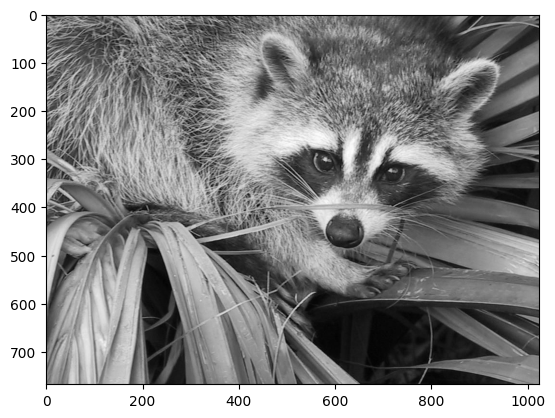

In [2]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

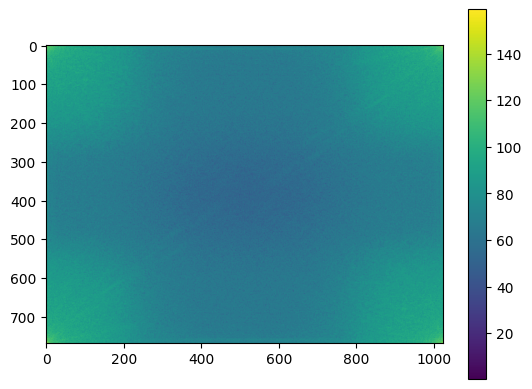

In [3]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

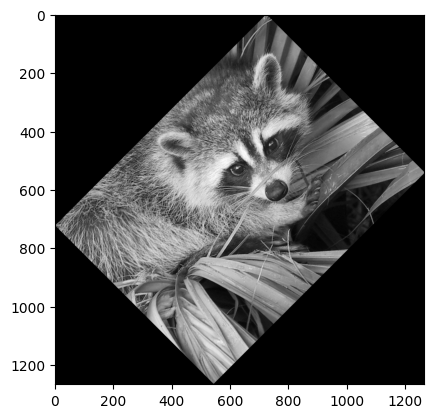

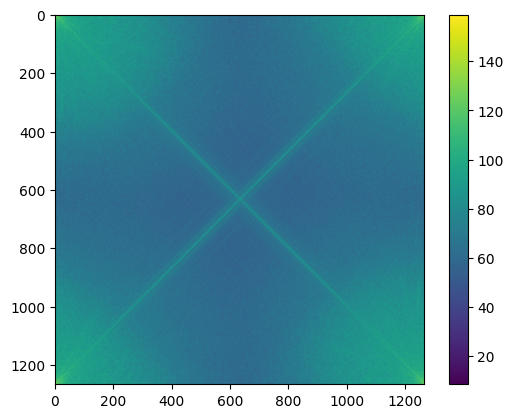

In [4]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

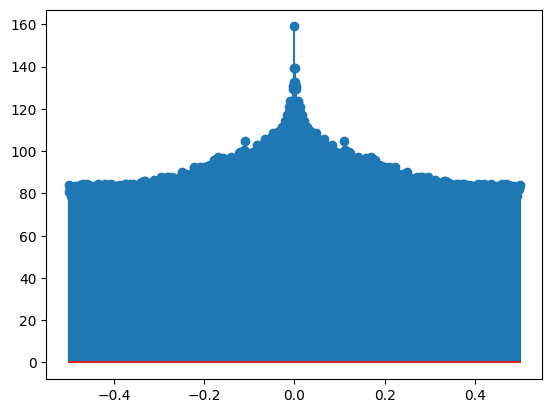

In [5]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

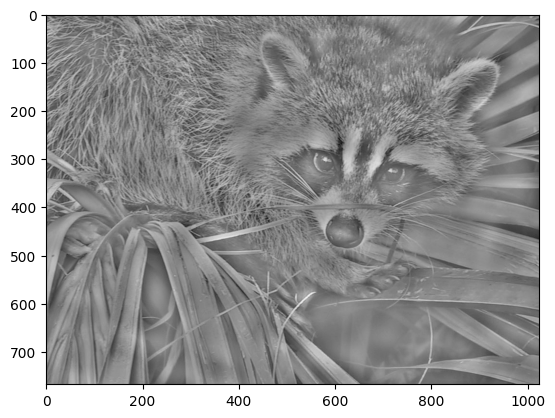

In [6]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

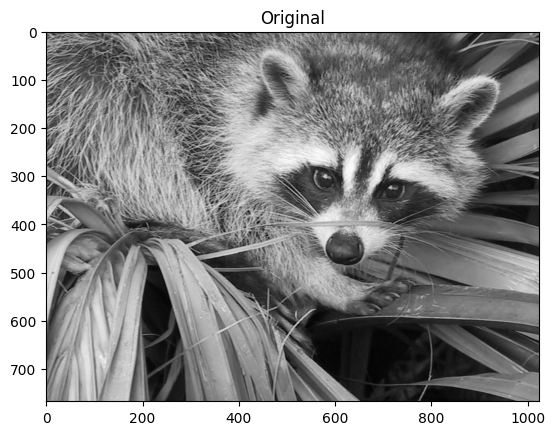

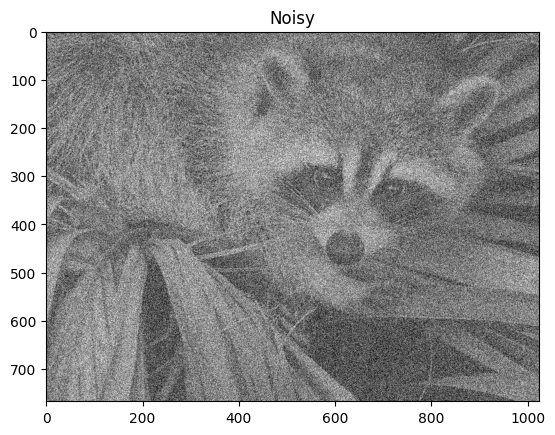

In [7]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. [8p] Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. [4p] Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. [4p] Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

4. [4p] Alegeți o secvență scurtă de timp (ex. 5-10 secunde) și eliminați un instrument la alegere din semnalul audio rezultat în urma rezolvării sarcinilor de la [laboratorul 5](https://cs.unibuc.ro/~pirofti/ps/ps-lab-5.pdf).

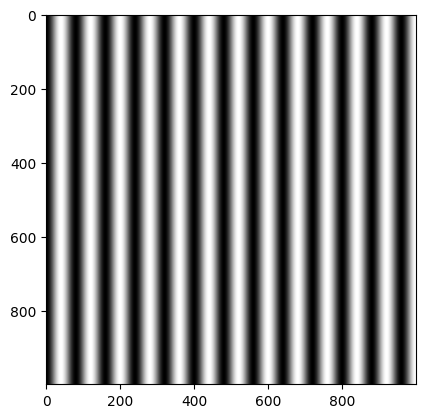

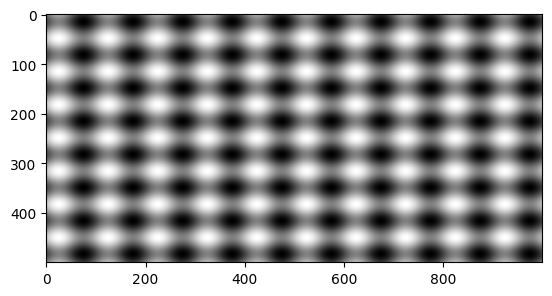

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#exercitiul 1

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 500, 1)

X, Y = np.meshgrid(x, x)

wavelength = 200
grating = np.sin((2 * np.pi * X+3*np.pi*X) / wavelength)

plt.set_cmap("gray")            #se creeaza o reprezentare 2D care poate fi folosita ca baza pentru ecuatie
plt.imshow(grating)
plt.show()

x = np.arange(-500, 500, 1)
y=np.arange(-250,250,1)

X, Y = np.meshgrid(x, y)

wavelength = 200
grating = np.sin((4 * np.pi * X) / wavelength)+np.cos((6 * np.pi * Y) / wavelength)

plt.set_cmap("gray")        #se creeaza o reprezentare 2D care poate fi folosita ca baza pentru ecuatie
plt.imshow(grating)         #datorita utilizarii de sin si cos liniile se suprapun si se formeaza romburi
plt.show()


import numpy as np
import matplotlib.pyplot as plt
N = 100

def f1(n1, n2):
    if n1==0 and (n2==5 or n2==N-5):
        return 1
    else:
        return 0

def f2(n1, n2):
    if n2==0 and (n1==5 or n1==N-5):
        return 1
    else:
        return 0

def f3(n1, n2):
    if (n1==5 or n1==N-5) and (n2==5 or n2==N-5):
        return 1
    else:
        return 0

N1, N2 = np.mgrid[0:N:1, 0:N:1]
x = f1(N1, N2)
plt.imshow(x)
plt.show()

N1, N2 = np.mgrid[0:N:1, 0:N:1]
x = f2(N1, N2)
plt.imshow(x)
plt.show()

N1, N2 = np.mgrid[0:N:1, 0:N:1]
x = f3(N1, N2)
plt.imshow(x)
plt.show()



In [ ]:
#  exercitiul 2

from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

def compress_image(image, min_snr):
    # Calculeaza SNR-ul original
    original_snr = calculate_snr(image)
    print(f'Original SNR: {original_snr}')
    # Creaza o copie a imaginii originale
    filtered_image = image.copy()
    # Seteaza o valoare sigma initiala pentru filtrul Gaussian, insa 
    # am comentat-o deoarece in cele din urma am folosit filtru median
    #sigma = 0.5
    # Seteaza SNR-ul orifinal
    snr = original_snr
    # Aplica filtrul Median si calculeaza SNR-ul pana cand acesta
    # este mai mare decat valoarea minima
    while snr > min_snr:
        filtered_image = ndimage.median_filter(filtered_image, size=3)
        snr = calculate_snr(filtered_image)
    return filtered_image

def calculate_snr(image):
    noise = np.random.normal(0, 1, image.shape)
    noisy_image = image + noise
    mse = mean_squared_error(image, noisy_image)
    return 10 * np.log10(np.mean(image ** 2) / mse)



# Comprima imaginea
compressed_image = compress_image(X, 49.1)

# Afiseaza imiaginea originala si SNR-ul ei
plt.figure()
plt.imshow(X)
plt.title(f'Original SNR: {calculate_snr(X)}')

# Afiseaza imaginea filtrata si SNR-ul ei
plt.figure()
plt.imshow(compressed_image)
plt.title(f'Filtered SNR: {calculate_snr(compressed_image)}')

# Afiseaza imaginile
plt.show()



Original SNR: 49.20235621187659


In [ ]:
# exercitiul 4
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import sounddevice as sd

# incarcarea fișierului audio
rate, data = wavfile.read('laboratorul5.wav')

# Crearea filtrului de trecere joasă
nyquist_freq = rate / 2
normal_cutoff = 1200 / nyquist_freq
b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)

# Aplicarea filtrului de trecere joasă la datele audio
filtered_data = signal.lfilter(b, a, data)

# Redarea primelor 10 secunde din sunetul filtrat
sd.play(filtered_data[:rate*10], rate)
